In [1]:
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [8]:
df = pd.read_csv('bank-additional.csv')
columns = df.columns.values[0].split(';')
columns = [column.replace('"', '') for column in columns]
df = df.values
df = [items[0].split(';') for items in df]
df = pd.DataFrame(df,columns = columns)

df['job'] = df['job'].str.replace('"', '')
df['marital'] = df['marital'].str.replace('"', '')
df['education'] = df['education'].str.replace('"', '')
df['default'] = df['default'].str.replace('"', '')
df['housing'] = df['housing'].str.replace('"', '')
df['loan'] = df['loan'].str.replace('"', '')
df['contact'] = df['contact'].str.replace('"', '')
df['month'] = df['month'].str.replace('"', '')
df['day_of_week'] = df['day_of_week'].str.replace('"', '')
df['poutcome'] = df['poutcome'].str.replace('"', '')
df['y'] = df['y'].str.replace('"', '')

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.2,-42,4.191,5195.8,no


In [10]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,...,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,67,12,4,8,3,3,3,2,10,5,...,25,21,7,3,10,26,26,234,11,2
top,32,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,1.4,93.994,-36.4,4.857,5228.1,no
freq,216,1012,2509,1264,3315,2175,3349,2652,1378,860,...,1764,3959,3523,3523,1626,758,758,274,1626,3668


In [13]:
df.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [14]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,2,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,4,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,yes,no,1,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,unknown,unknown,3,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,yes,no,1,0,nonexistent,-0.1,93.2,-42,4.191,5195.8,no


In [15]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
df.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='y', ylabel='count'>

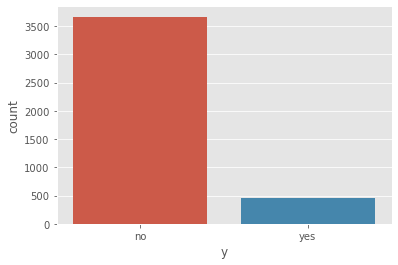

In [18]:
sns.countplot(x='y', data=df)

<AxesSubplot:xlabel='count', ylabel='job'>

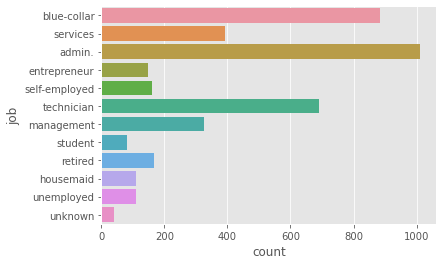

In [19]:
sns.countplot(y='job', data=df)

<AxesSubplot:xlabel='marital', ylabel='count'>

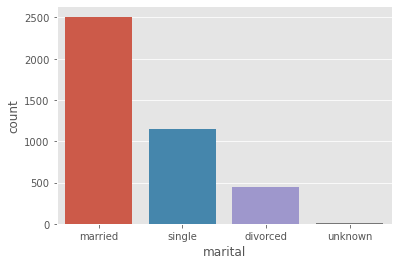

In [20]:
sns.countplot(x='marital', data=df)

In [21]:
df.education.value_counts()

university.degree      1264
basic                  1231
high.school             921
professional.course     535
unknown                 167
illiterate                1
Name: education, dtype: int64

<AxesSubplot:xlabel='count', ylabel='education'>

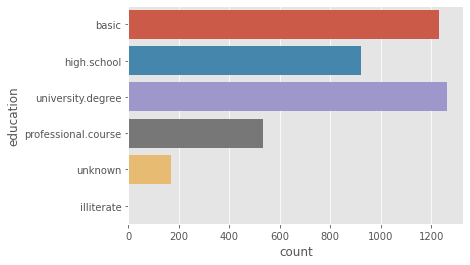

In [22]:
sns.countplot(y='education', data=df)

In [23]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic,yes,no,2,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,4,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,yes,no,1,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic,unknown,unknown,3,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,yes,no,1,0,nonexistent,-0.1,93.2,-42,4.191,5195.8,no


Pre Processing
Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values. LabelEncoder encode labels with value between 0 and n_classes-1

In [24]:
le = preprocessing.LabelEncoder()

In [25]:
df.job = le.fit_transform(df.job)

In [26]:
df.marital = le.fit_transform(df.marital)

In [35]:
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)
df.y=le.fit_transform(df.y)

In [36]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,0,2,0,2,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,1,0,0,4,0,1,1.1,93.994,-36.4,4.855,5191,0
2,25,7,1,1,2,0,1,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,0,1,1,3,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,4,2,0,1,0,1,-0.1,93.2,-42,4.191,5195.8,0


In [37]:
df.shape

(4119, 15)

In [38]:
X = df.iloc[:,0:14]
X[0:10]

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,1,1,0,2,0,2,0,1,-1.8,92.893,-46.2,1.313,5099.1
1,39,7,2,1,0,0,4,0,1,1.1,93.994,-36.4,4.855,5191
2,25,7,1,1,2,0,1,0,1,1.4,94.465,-41.8,4.962,5228.1
3,38,7,1,0,1,1,3,0,1,1.4,94.465,-41.8,4.959,5228.1
4,47,0,1,4,2,0,1,0,1,-0.1,93.2,-42,4.191,5195.8
5,32,7,2,4,0,0,3,2,0,-1.1,94.199,-37.5,0.884,4963.6
6,32,0,2,4,2,0,4,0,1,-1.1,94.199,-37.5,0.879,4963.6
7,41,2,1,4,2,0,2,0,1,-0.1,93.2,-42,4.191,5195.8
8,31,7,0,3,0,0,1,1,0,-0.1,93.2,-42,4.153,5195.8
9,35,1,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.855,5191


In [39]:
y = df.iloc[:,14]
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int32

In [40]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
x_train.shape, y_train.shape

((3295, 14), (3295,))

In [42]:
x_test.shape, y_test.shape

((824, 14), (824,))

Training the model

Logistic Regression

In [43]:
model=LogisticRegression(penalty='l2', max_iter=1000)


In [44]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:
prediction=model.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9089805825242718

In [47]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[734  14]
 [ 61  15]]


Support Vector Machine (SVM)

In [49]:
from sklearn.svm import SVC
clf = SVC()

In [50]:
clf.fit(x_train, y_train)

SVC()

In [51]:
pred = clf.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)


0.9077669902912622

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [54]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
predict = rfc.predict(x_test)

In [56]:
accuracy_score(y_test, predict)

0.8944174757281553

Neural Network